In [365]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [366]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
from lightgbm import LGBMClassifier


# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [367]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [368]:
train_data.info()
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

(20758, 18)

In [369]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [370]:
train_data.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [371]:
train_data.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [372]:
numerical = [var for var in train_data.columns if (train_data[var].dtype=='float64') or (train_data[var].dtype=='int64')]
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)


There are 9 numerical variables

The numerical variables are :

 ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [373]:
categorical = [var for var in train_data.columns if (train_data[var].dtype!='float64') and (train_data[var].dtype!='int64')]
print('There are {} categorical variables\n'.format(len(categorical)))
print('The numerical variables are :\n\n', categorical)


There are 9 categorical variables

The numerical variables are :

 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [374]:
train_data.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

**Exploratory Data Analysis**

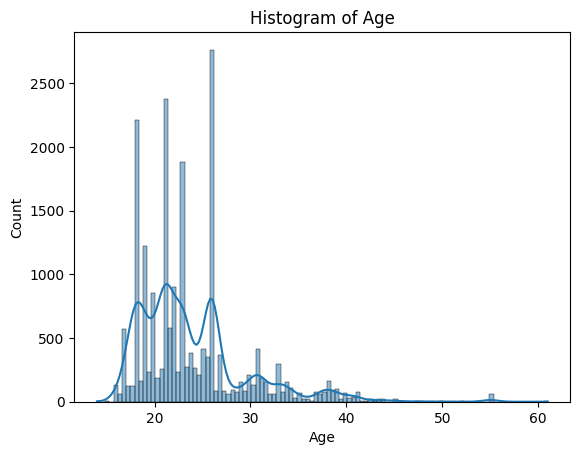

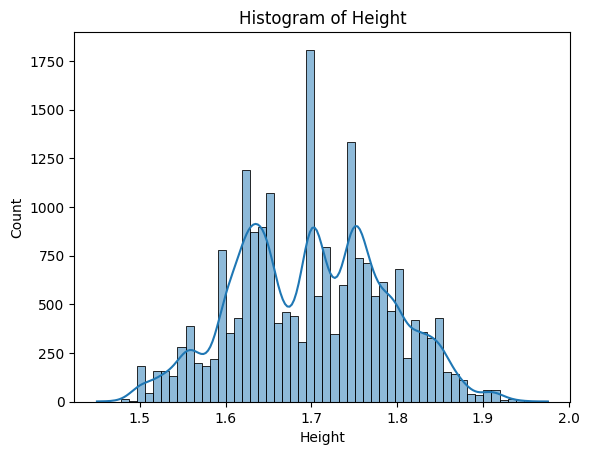

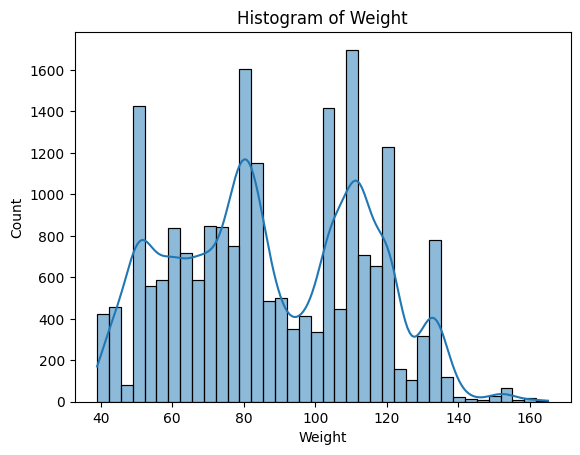

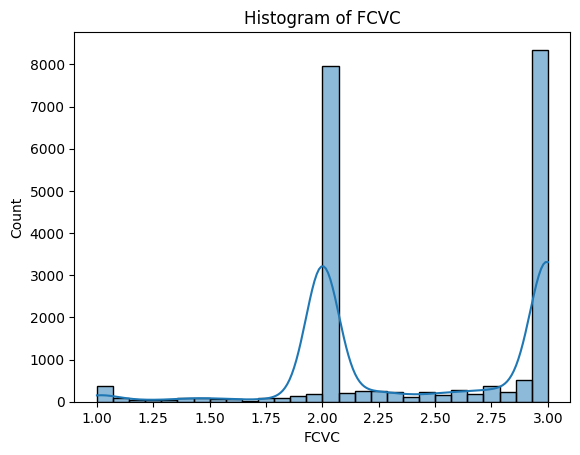

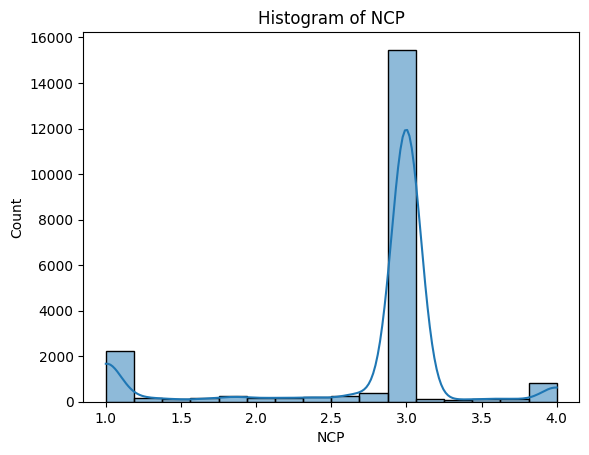

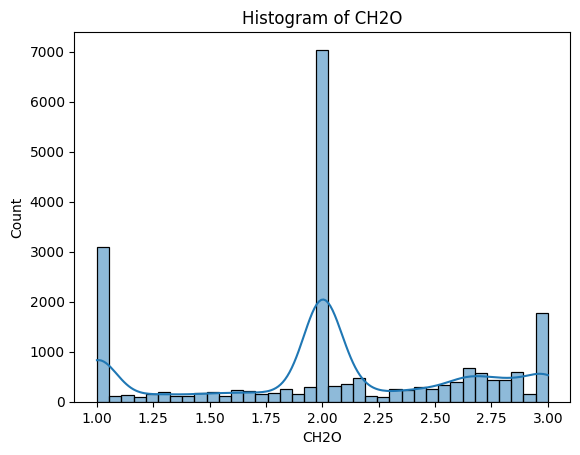

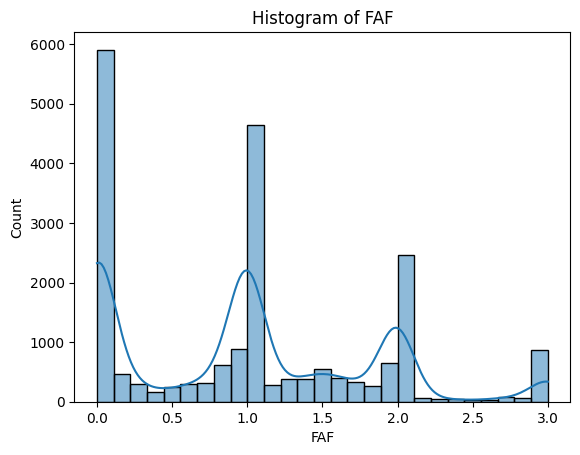

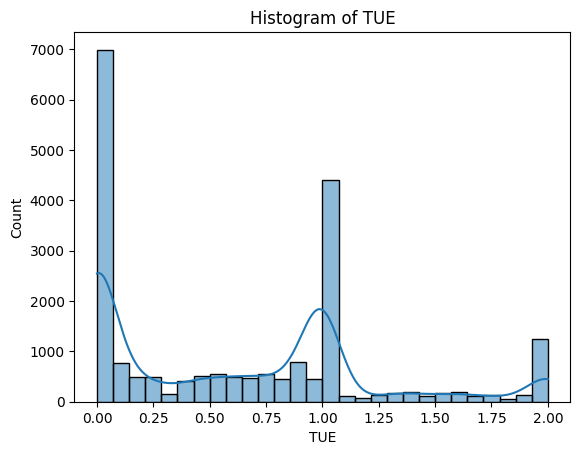

In [375]:
num_features = train_data.select_dtypes('number').drop(columns='id')

for feature in num_features:
    sns.histplot(data=train_data, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

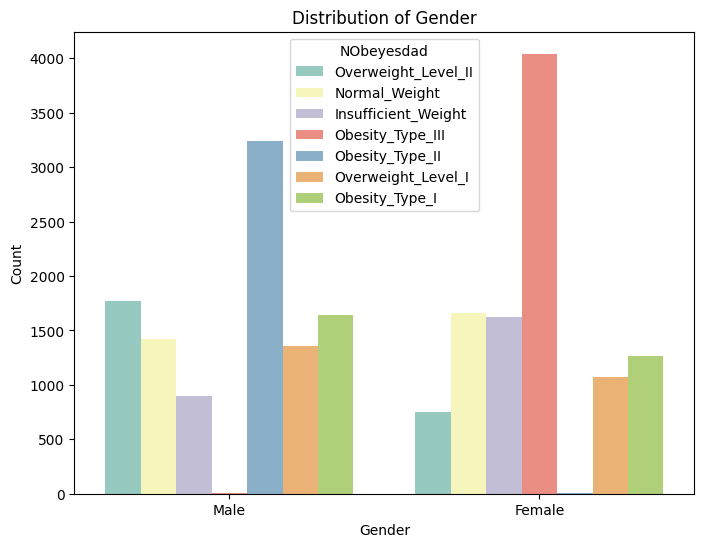

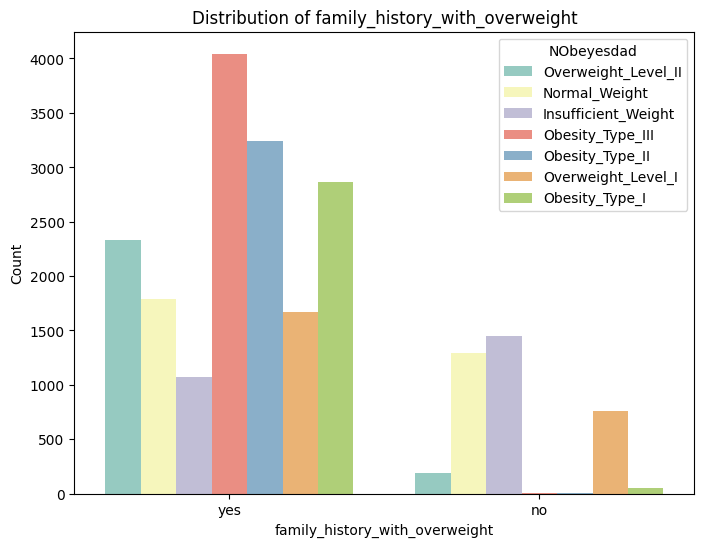

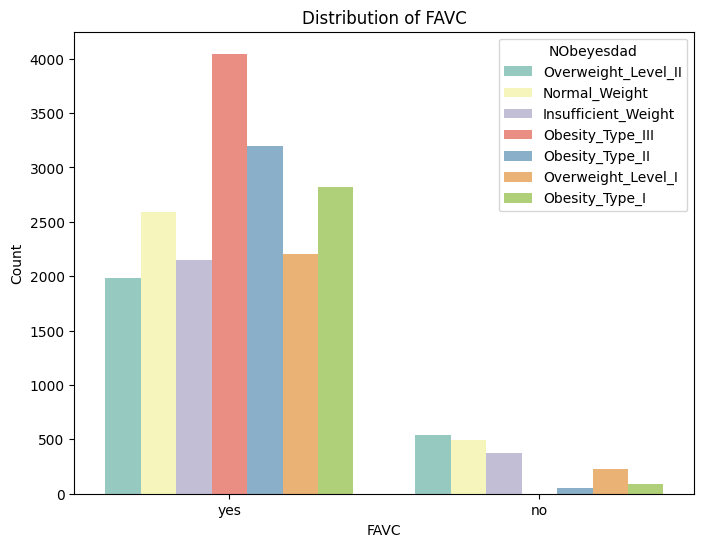

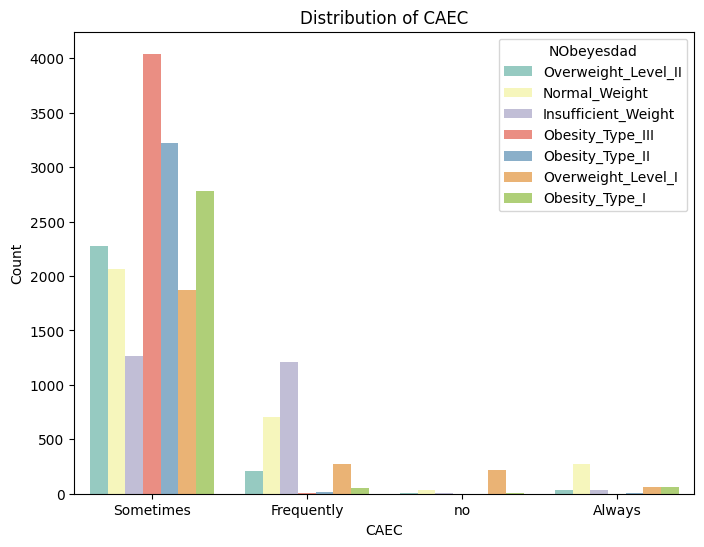

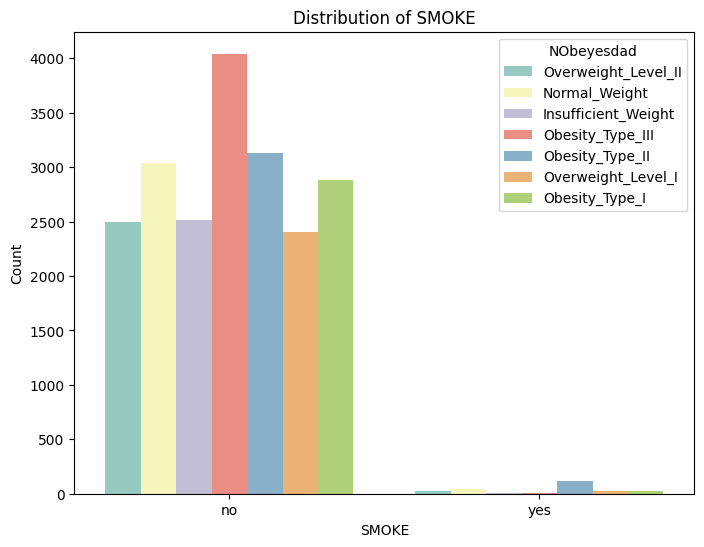

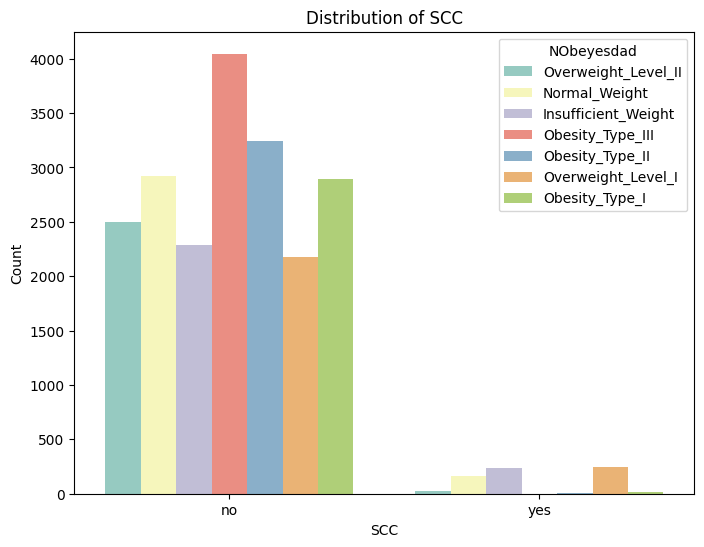

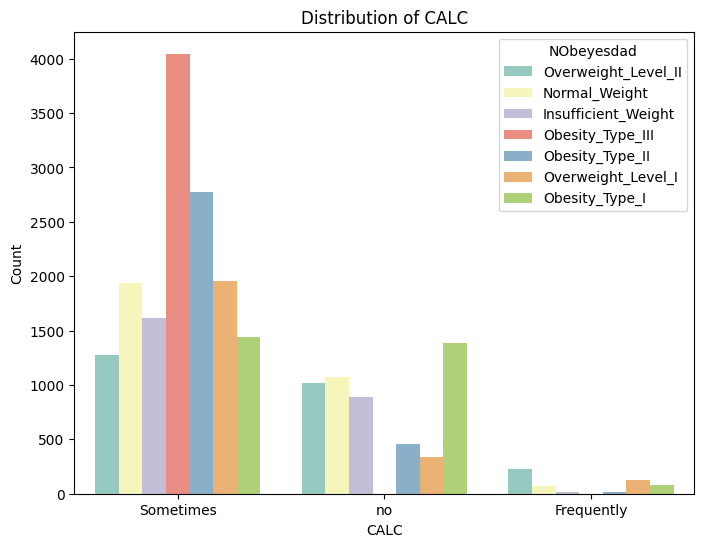

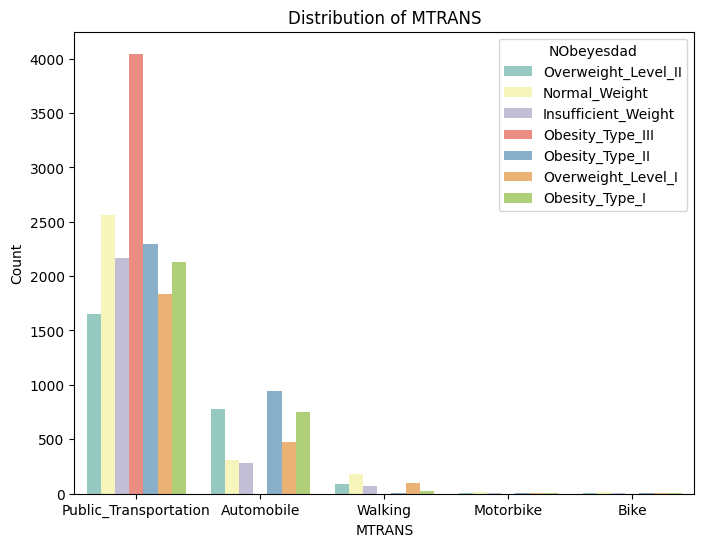

In [376]:
cat_features = train_data.select_dtypes('object').drop(columns="NObeyesdad")
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=train_data, palette='Set3',hue="NObeyesdad")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


Text(0.5, 1.0, 'The distribution of Obesity risk')

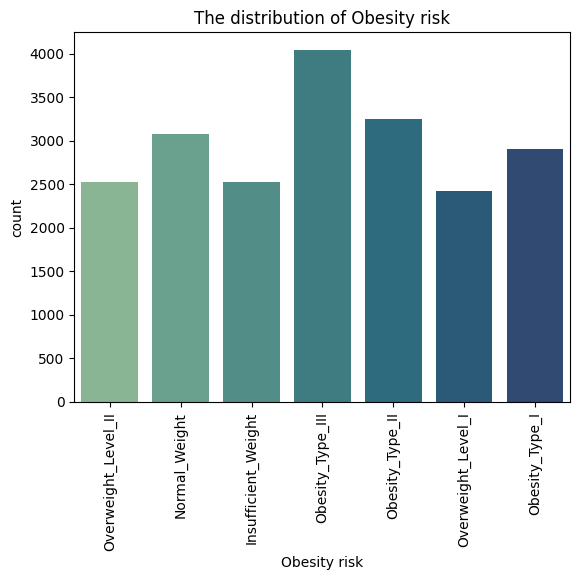

In [377]:
sns.countplot(data = train_data, 
              x = 'NObeyesdad', 
              palette = 'crest')

plt.xlabel('Obesity risk')
plt.xticks(rotation=90)
plt.title('The distribution of Obesity risk')




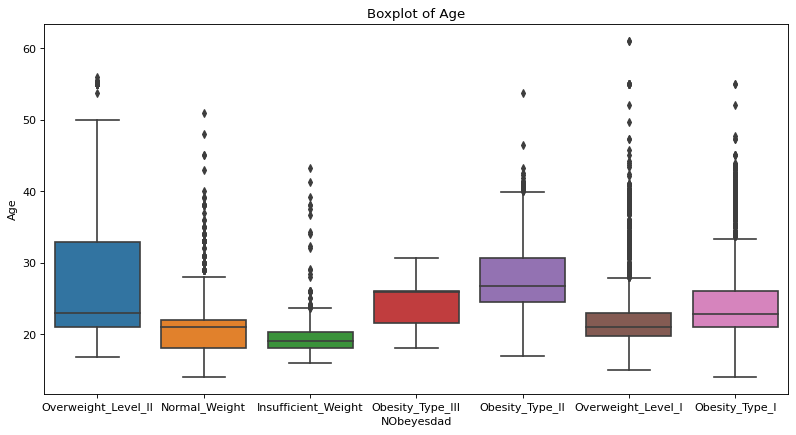

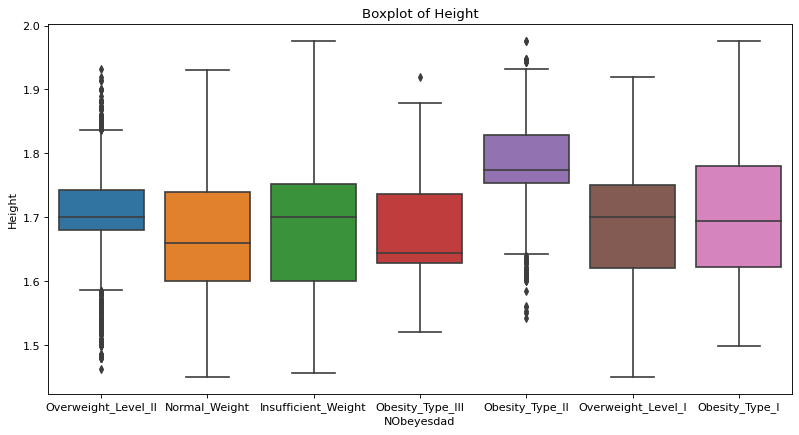

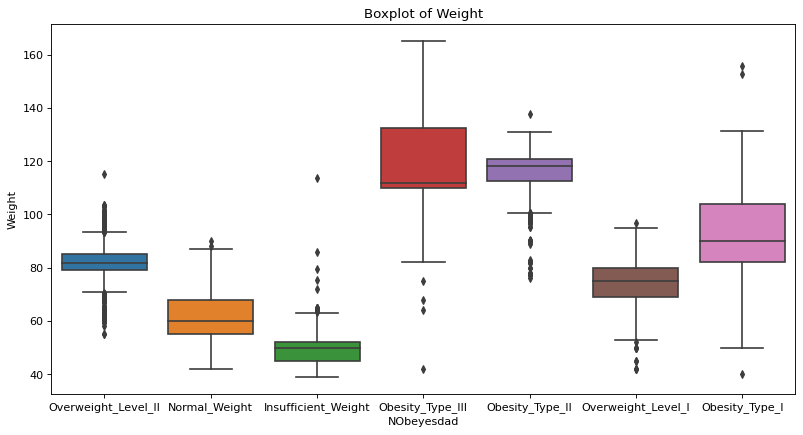

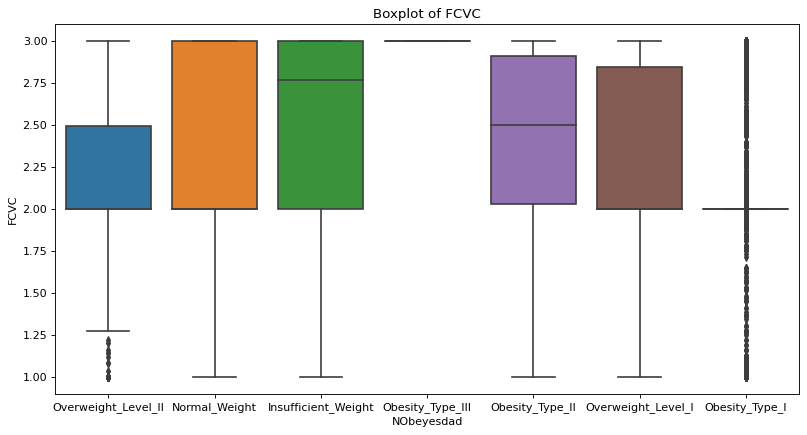

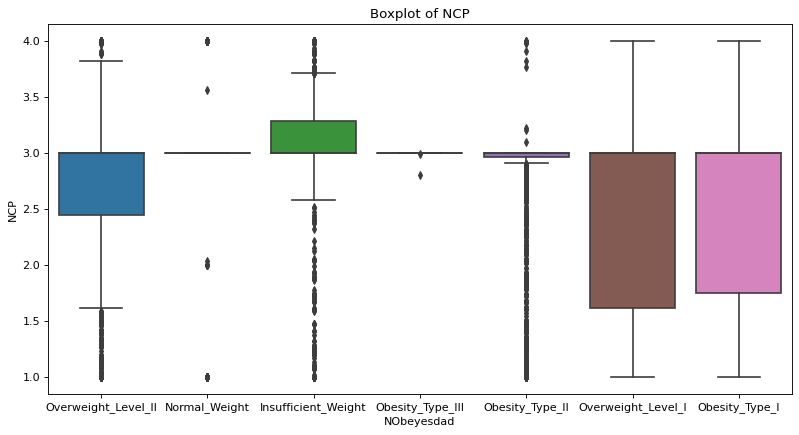

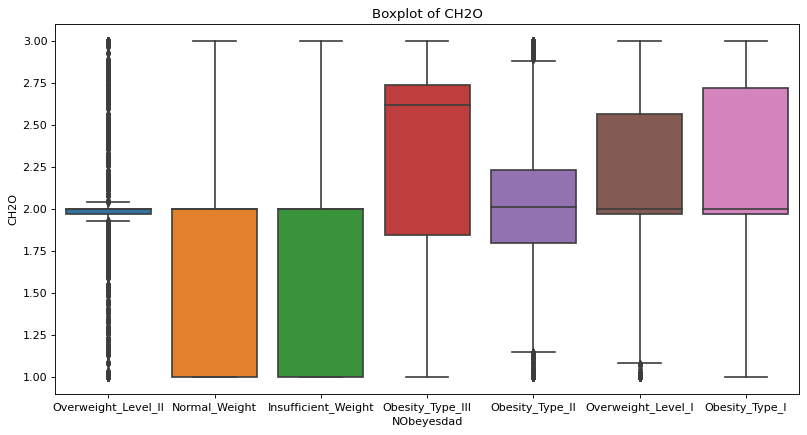

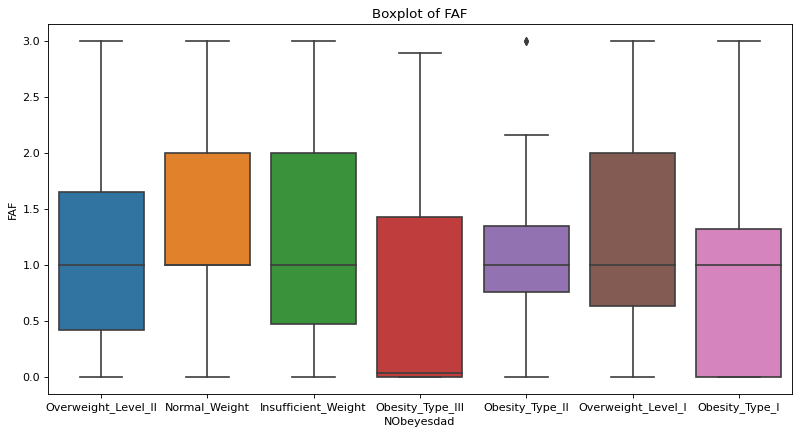

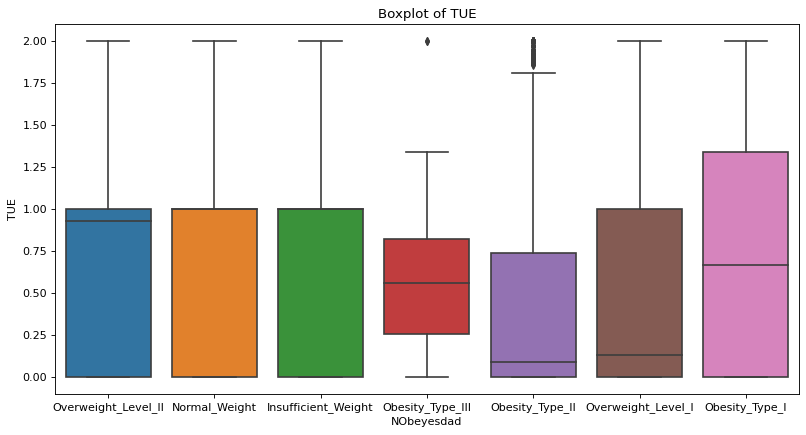

In [378]:
for feature in num_features:
    plt.figure(figsize=(12, 6), dpi=80)
    sns.boxplot(data=train_data, y=feature, x = 'NObeyesdad')
    plt.title(f'Boxplot of {feature}')
    plt.show()

**Feature Engineering**

In [380]:
#Import and merge train & test sets
train_data = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

merged_data = pd.concat([train_data,test_data])
merged_data.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


<Axes: xlabel='NObeyesdad', ylabel='BMI'>

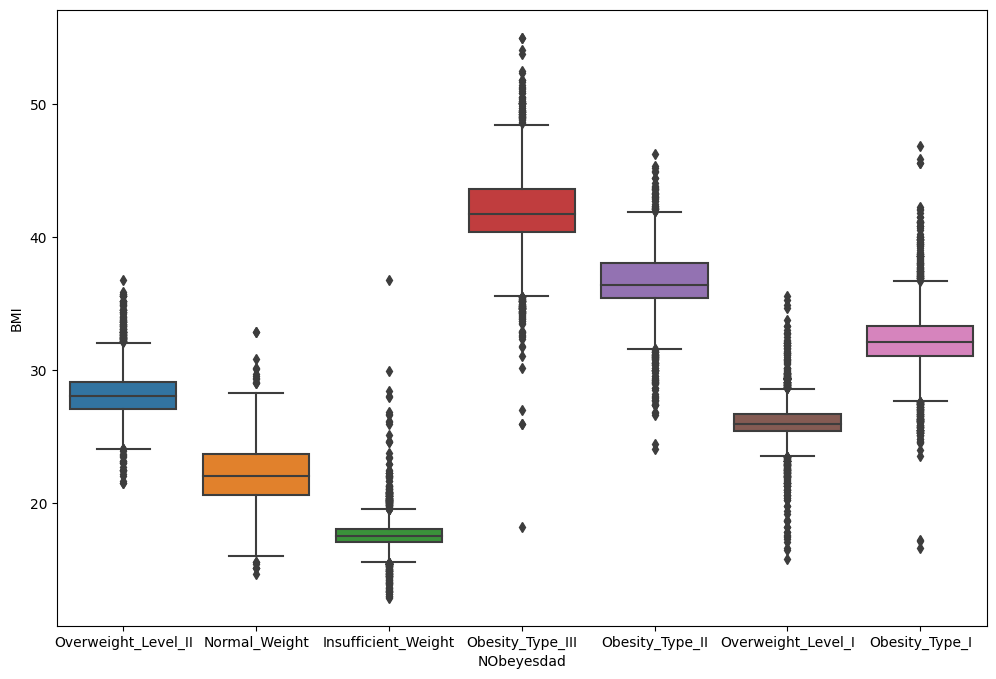

In [381]:
#Create BMI
merged_data["BMI"]  = merged_data["Weight"]/(merged_data["Height"]**2)
plt.figure(figsize=(12,8))
sns.boxplot(data = merged_data, x="NObeyesdad",y="BMI") 


<Axes: xlabel='BMI', ylabel='Count'>

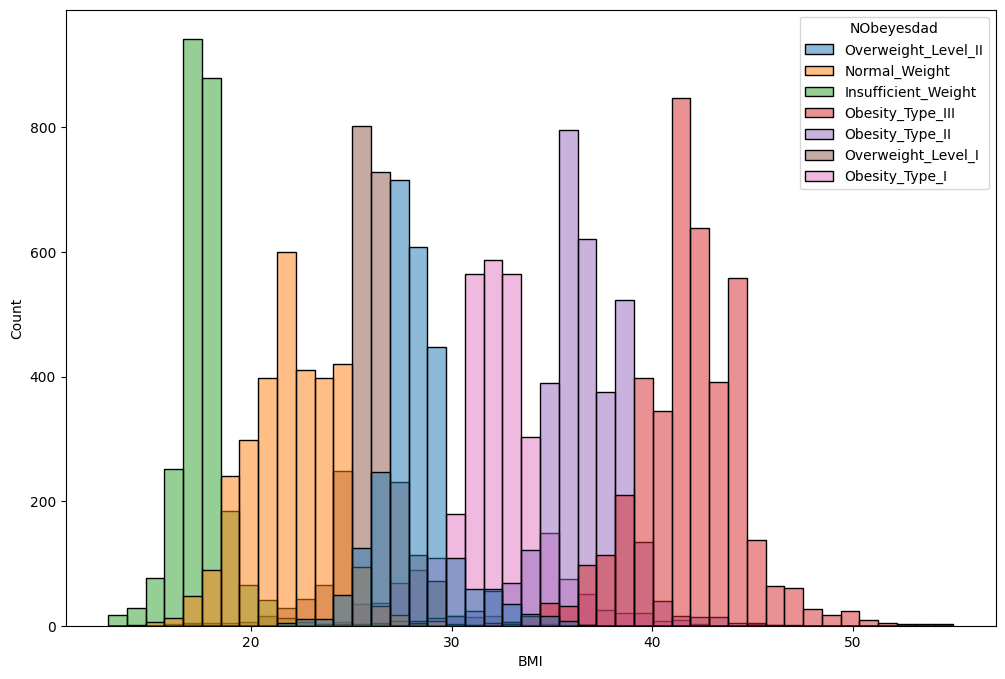

In [382]:
plt.figure(figsize=(12,8))
sns.histplot(data = merged_data, x="BMI",hue="NObeyesdad") 


In [383]:
#change target to numerical values
map_target = {'Insufficient_Weight': 0,
              'Normal_Weight': 1,
              'Overweight_Level_I': 2,
              'Overweight_Level_II': 3,
              'Obesity_Type_I': 4,
              'Obesity_Type_II': 5,
              'Obesity_Type_III': 6,
             }

merged_data['NObeyesdad'] = merged_data['NObeyesdad'].map(map_target)

merged_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,3.0,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,1.0,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,0.0,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,6.0,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,3.0,25.599151


In [384]:
for i in cat_features.columns:
    print(cat_features[i].value_counts())

Gender
Female    10422
Male      10336
Name: count, dtype: int64
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
FAVC
yes    18982
no      1776
Name: count, dtype: int64
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
SMOKE
no     20513
yes      245
Name: count, dtype: int64
SCC
no     20071
yes      687
Name: count, dtype: int64
CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64
MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64


In [385]:
# Change the categoric features to numerical values

encoder = LabelEncoder()

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for column in columns_to_encode:
    merged_data[column] = encoder.fit_transform(merged_data[column])



In [ ]:
merged_data.head()

<Axes: >

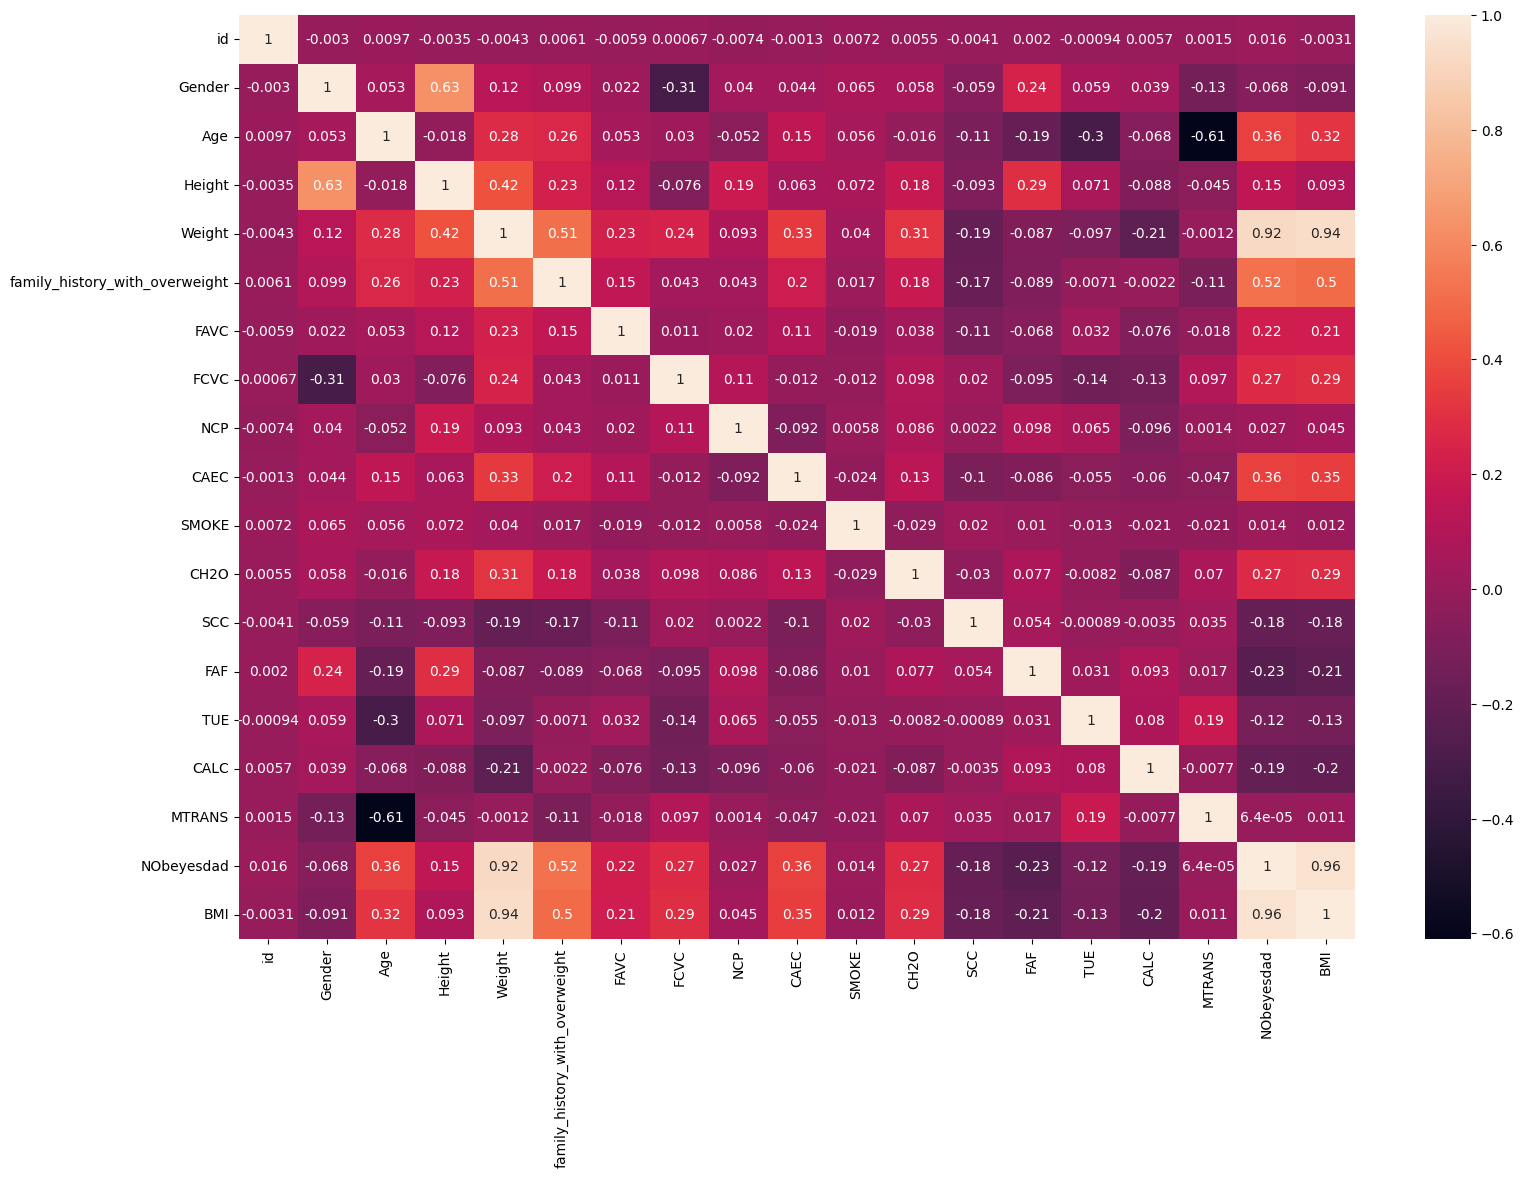

In [386]:
#Check correlations

plt.figure(figsize=(18,12))

sns.heatmap(merged_data.corr(),annot=True)

<Axes: >

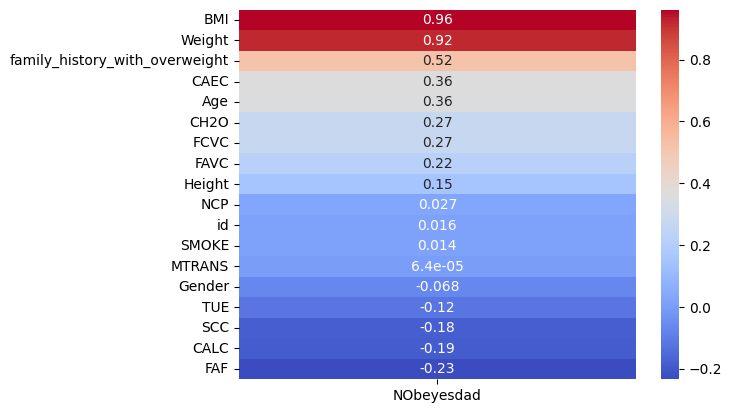

In [387]:
# The correlation to Obesity risk (Target)

target_corr = merged_data.corr()["NObeyesdad"].drop("NObeyesdad").sort_values(ascending=False).to_frame()

sns.heatmap(target_corr,cmap="coolwarm", annot=True)

In [ ]:
merged_data.head()

In [388]:
# Reform splits to train, test dataset
merged_data.drop('id',axis=1,inplace=True) 

df_train = merged_data[:len(train_data)]
df_test = merged_data[len(train_data):]

In [389]:
X = df_train.drop(columns = 'NObeyesdad')
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,2,3,28.259565
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,3,0,23.422091
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,3,3,17.126706
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,2,3,44.855798
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,2,3,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,0,2.151809,0,1.330519,0.196680,2,3,36.587084
20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,0,1.000000,0,2.000000,1.000000,2,3,17.099278
20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,0,2.000000,0,1.158040,1.198439,3,3,31.889841
20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,0,2.144838,0,0.000000,0.973834,3,0,28.899693


In [390]:
y = df_train[["NObeyesdad"]]
y

,NObeyesdad
0,3.0
1,1.0
2,0.0
3,6.0
4,3.0
...,...
20753,5.0
20754,0.0
20755,5.0
20756,3.0


In [391]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.2,random_state=0)
y_train.head()

,NObeyesdad
7320,6.0
11946,3.0
5370,4.0
1179,6.0
10598,4.0


**Creating the models for the classification problem**

* Decision Tree
* K-nearest Neighbors
* Logistic Regression

In [392]:
DT = DecisionTreeClassifier(max_depth=7)

# Train the classifier
DT.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_dt = DT.predict(X_val)

# Calculate accuracy
dt_accuracy = accuracy_score(y_val, y_pred_dt)

print("Accuracy is: ",dt_accuracy)
print(classification_report(y_val,y_pred_dt))
print(confusion_matrix(y_val,y_pred_dt))

Accuracy is:  0.8610308285163777
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       478
         1.0       0.85      0.84      0.84       630
         2.0       0.69      0.72      0.71       472
         3.0       0.72      0.72      0.72       510
         4.0       0.80      0.82      0.81       582
         5.0       0.98      0.91      0.94       673
         6.0       0.99      0.99      0.99       807

    accuracy                           0.86      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.86      0.86      0.86      4152

[[442  32   4   0   0   0   0]
 [ 43 529  54   2   2   0   0]
 [  2  56 342  66   5   0   1]
 [  0   8  79 367  54   1   1]
 [  1   0  16  69 480  14   2]
 [  0   0   2   6  49 615   1]
 [  0   0   0   0   7   0 800]]


Text(0.5, 1.0, 'Feature Importances from Decision Tree model')

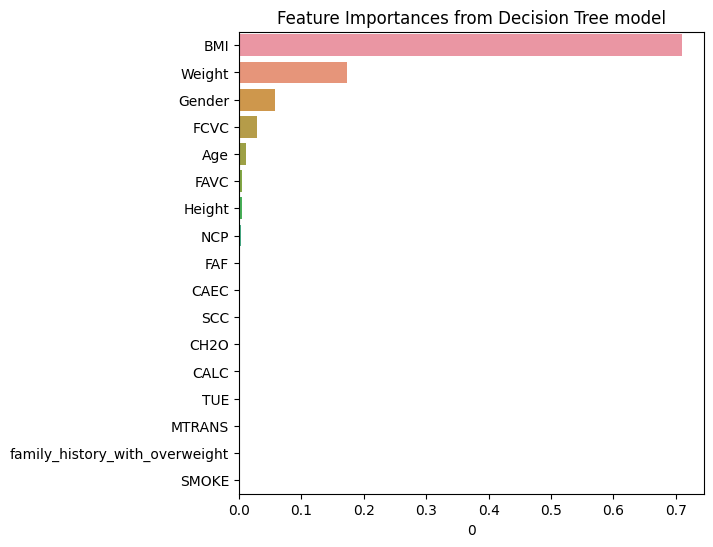

In [393]:
# Feature Importances

importances = pd.DataFrame(DT.feature_importances_,index = X.columns)

importances.sort_values(by = 0, inplace=True, ascending = False)
plt.figure(figsize=(6, 6)) 
sns.barplot(x=0, y=importances.index, data=importances)

plt.title('Feature Importances from Decision Tree model')

In [394]:
#K Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_val)

knn_accuracy = accuracy_score(y_pred_knn,y_val)


print("Accuracy is: ",knn_score)
print(classification_report(y_val,y_pred_knn))
print(confusion_matrix(y_val,y_pred_knn))

Accuracy is:  0.8730732177263969
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       478
         1.0       0.85      0.81      0.83       630
         2.0       0.70      0.75      0.73       472
         3.0       0.77      0.76      0.77       510
         4.0       0.88      0.84      0.86       582
         5.0       0.96      0.94      0.95       673
         6.0       0.98      0.99      0.99       807

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152

[[445  28   5   0   0   0   0]
 [ 54 513  55   8   0   0   0]
 [  2  52 356  56   6   0   0]
 [  1  12  70 390  33   4   0]
 [  1   1  21  45 486  20   8]
 [  0   0   0   8  22 634   9]
 [  0   0   0   0   3   3 801]]


In [395]:
#Logistic Regression
LR = LogisticRegression(max_iter=300)

LR.fit(X_train,y_train)

y_pred_lr = LR.predict(X_val)

lr_accuracy = accuracy_score(y_pred_lr,y_val)


print("Accuracy is: ",lr_score)
print(classification_report(y_val,y_pred_lr))
print(confusion_matrix(y_val,y_pred_lr))

Accuracy is:  0.76252408477842
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       478
         1.0       0.69      0.71      0.70       630
         2.0       0.58      0.52      0.54       472
         3.0       0.56      0.53      0.54       510
         4.0       0.68      0.69      0.69       582
         5.0       0.85      0.90      0.88       673
         6.0       0.97      1.00      0.99       807

    accuracy                           0.76      4152
   macro avg       0.74      0.74      0.74      4152
weighted avg       0.76      0.76      0.76      4152

[[388  85   3   1   0   0   1]
 [ 78 450  65  32   3   1   1]
 [  1  80 244 102  41   4   0]
 [  0  30  78 270  99  31   2]
 [  0   4  33  61 402  68  14]
 [  0   0   1  18  43 607   4]
 [  0   0   0   0   2   0 805]]


In [396]:
# Light Gradient Boosting Machine

lgbm_model = 
()

lgbm_model.fit(X_train,y_train)

lgbm_predict = lgbm_model.predict(X_val)

lgbm_score = accuracy_score(lgbm_predict,y_val)
print(classification_report(y_val,lgbm_predict))
print(confusion_matrix(y_val,lgbm_predict))
print('The accuracy of Light Gradient Boosting Machine is',lgbm_score)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2307
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 17
[LightGBM] [Info] Start training from score -2.094366
[LightGBM] [Info] Start training from score -1.912860
[LightGBM] [Info] Start training from score -2.139374
[LightGBM] [Info] Start training from score -2.110635
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.863915
[LightGBM] [Info] Start training from score -1.634499
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       478
         1.0       0.87      0.87      0.87       630
         2.0       0.77      0.76      0.77       472
         3.0       0.79      0.83      0.80       51

Text(0.5, 1.0, 'Feature Importances from XGB model')

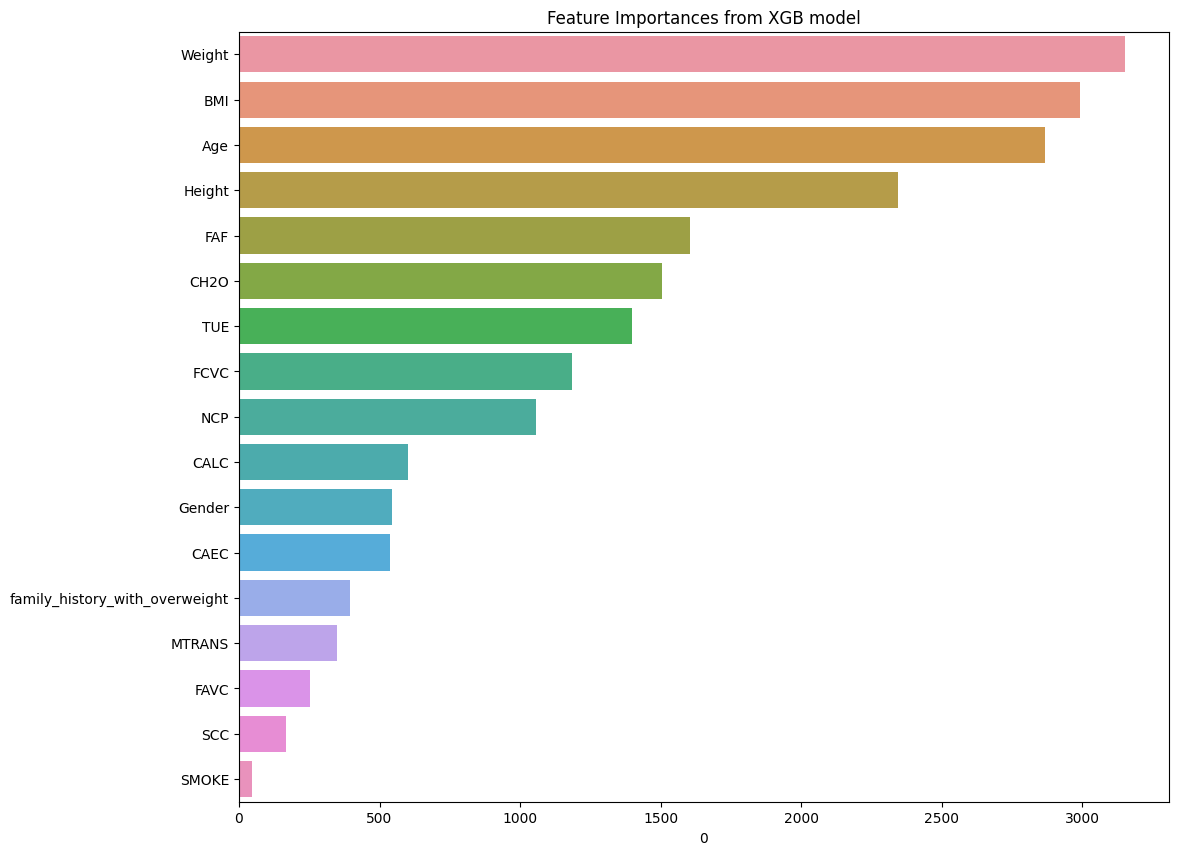

In [397]:
# Feature Importances

importances = pd.DataFrame(lgbm_model.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(12, 10)) 
sns.barplot(x=0, y=importances.index, data=importances)
plt.title('Feature Importances from XGB model')

Text(0.5, 1.0, 'LGBM')

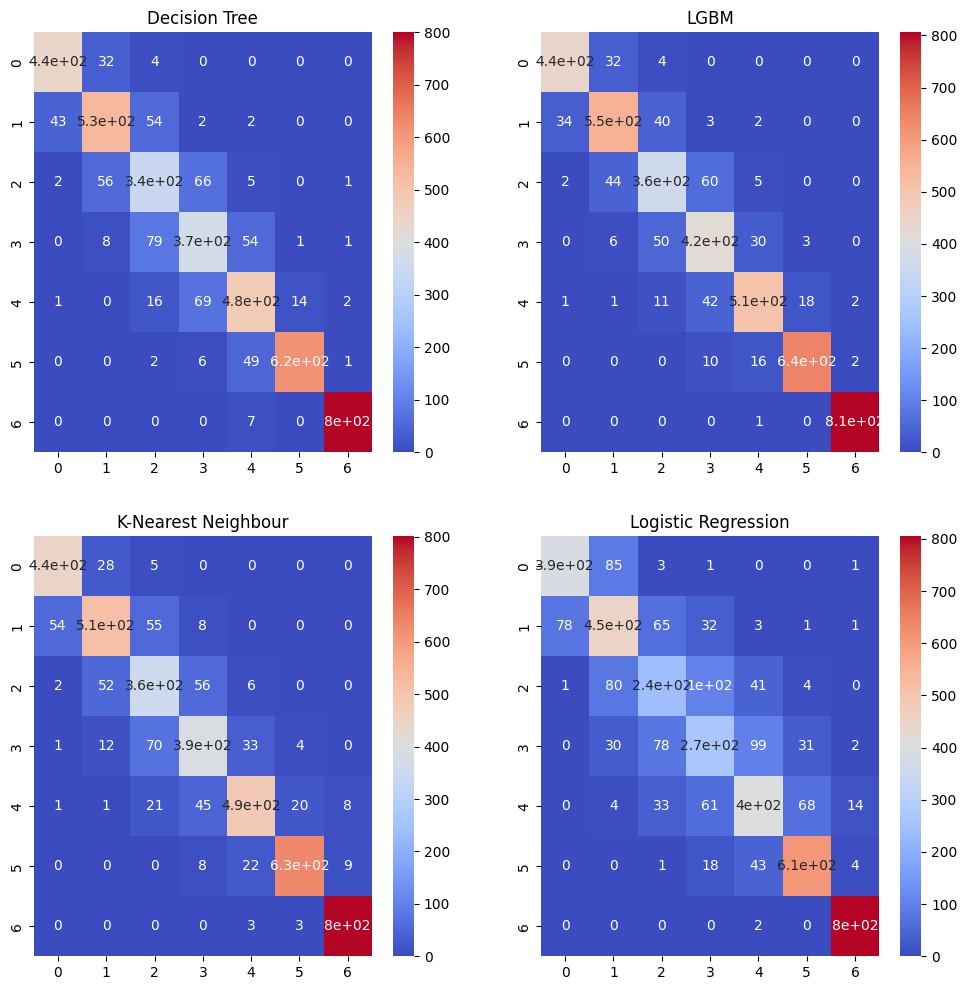

In [398]:
# Visualisation of Confusion Matrix compare between each model

fig, ax  = plt.subplots(2,2, figsize = (12,12))

sns.heatmap(confusion_matrix(y_val, y_pred_dt), annot = True, cmap = 'coolwarm', ax = ax[0,0]).set_title('Decision Tree')
sns.heatmap(confusion_matrix(y_val, y_pred_knn), annot = True, cmap = 'coolwarm', ax = ax[1,0]).set_title('K-Nearest Neighbour')
sns.heatmap(confusion_matrix(y_val, y_pred_lr), annot = True, cmap = 'coolwarm', ax = ax[1,1]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_val, lgbm_predict), annot = True, cmap = 'coolwarm', ax = ax[0,1]).set_title('LGBM')

In [399]:
compare = pd.DataFrame({'Model': ['Decision Tree',
                                  'K-Nearest Neighbour',
                                  'LGBM',
                                  'Logistic Regression'], 
                        'Accuracy': [dt_accuracy,
                                     knn_accuracy,
                                     lgbm_score,
                                     lr_accuracy]})

compare.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
2,LGBM,0.899085
1,K-Nearest Neighbour,0.873073
0,Decision Tree,0.861031
3,Logistic Regression,0.762524


In [ ]:
X_val.head()

In [404]:
df_test.drop(columns="NObeyesdad",inplace=True)

In [405]:
lgbm_predict =lgbm_model.predict(df_test)

len(lgbm_predict)

13840

In [401]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
sample_submission 

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


In [408]:
submission_df = pd.DataFrame({'id': sample_submission['id'],
                              'NObeyesdad': lgbm_predict})

unmapping = {0:"Insufficient_Weight",
            1:"Normal_Weight",
            2:"Overweight_Level_I",
            3:"Overweight_Level_II",
            4:"Obesity_Type_I",
            5:"Obesity_Type_II",
            6:"Obesity_Type_III"
            }


submission_df['NObeyesdad'] = submission_df['NObeyesdad'].map(unmapping)
submission_df.head()


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [409]:
submission_df.to_csv('submission.csv', index=False)